# Data Pre-processing

['Diseased_', 'Healthy']
[0 1]
{'Diseased_': 0, 'Healthy': 1}
C:\Users\acer\Desktop\projects\Python\mini_project\Plant disease detection  Dataset\Diseased_\.DS_Store OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

(410, 150, 150, 3)
(410,)


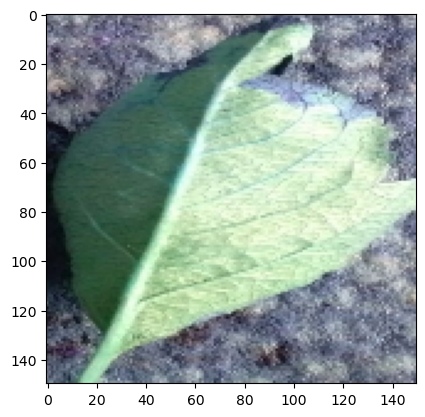

410 150 150



In [1]:
#importing necessary libraries
import os
import numpy as np
import cv2

#specifying the path to the dataset
data_path = r'C:\Users\acer\Desktop\projects\Python\mini_project\Plant disease detection  Dataset'
categories = os.listdir(data_path)  #listing all the categories in the dataset
print(categories)  #printing the categories

#creating labels for each category
labels = np.arange(len(categories))
print(labels)  #printing the labels

#creating a dictionary to map category names to labels
label_dict = dict(zip(categories, labels))
print(label_dict)  #printing the label dictionary

#setting the size to which each image will be resized
img_size = 150

#creating lists to store the data and labels
data = []
target = []

#iterating through each category
for category in categories:
    category_path = os.path.join(data_path, category)  #path to the category folder
    img_names = os.listdir(category_path)  #listing all the images in the category folder
    #iterating through each image in the category
    for img_name in img_names:
        img_path = os.path.join(category_path, img_name)  #path to the image file
        try:
            img = cv2.imread(img_path)  #reading the image
            img = cv2.resize(img, (img_size, img_size))  #resizing the image
            data.append(img)  #appending the image to the data list
            target.append(label_dict[category])  #appending the label to the target list
        except Exception as e:
            print(img_path, e)  #printing the path and error if there is an exception

#converting the data and target lists to numpy arrays
data = np.array(data)
target = np.array(target)

#printing the shapes of the data and target arrays
print(data.shape)
print(target.shape)

#importing the pyplot module from matplotlib for visualization
from matplotlib import pyplot as plt

#displaying the first image in the data array
plt.imshow(data[0])
plt.show()

#printing the shape details of the data array
print(data.shape[0], data.shape[1], data.shape[2])

#normalizing the data
data = data / 255.0

#importing the to_categorical function from keras.utils for one-hot encoding
from keras.utils import to_categorical

#one-hot encoding the target labels
target = to_categorical(target)

#saving the data and target arrays to .npy files
np.save('data', data)
np.save('target', target)
